# Exploring Data With Python

A brief review of basic mathematical vocabulary and symbols combined with their application within Python

#### Mathmatical Topics Covered

1.  Population
2.  Sample
3.  Categorical Data (Probability Distribution)
4.  Basic visualizations (Bar Plot)
5.  Group Frequency 

#### Python Libraries

1. [numpy](https://numpy.org/)
2. [pandas](https://pandas.pydata.org/)
3. [matplotlib](https://matplotlib.org/)
4. [stemgraphic](http://stemgraphic.org/doc/intro.html)
______
While there are many opportunities to dive deep into python coding, this notebook's primary purpose is to demonstrate the solid mathematical and analytical foundation needed to perform detailed data analysis.  

## Loading Python Libraries

This process assumes you have completed the installation of the required packages in a virutal enviroment.  If you need additional help on setting up the correct enviroment please reach out on the Boston Python Slack channel. 



In [1]:
# import libraries using standard abbreviations
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from stemgraphic.alpha import stem_graphic

print("Library Versions")
print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))


Library Versions
numpy version: 1.22.1
pandas version: 1.3.5
matplotlib: 3.5.1


# Population vs. Sample

## Definitions

* A **population** is the entire group where you want to conclude something.
* A **sample** is the specific group to collect data about a population. The sample size is always less than the total size of the population.

## Collecting Data

**Populations** are used when you have access to data from the entire population. Here you might consider the manufacturing process where information is gathered about all aspects. Do they measure everything? Maybe if they make critical parts for space ships or submarines. 

Consider a company that makes paper cups. Do you believe they would measure every paper cup? Imagine what that would do to the price. Yet paper cups seem to all be about the same. This consistency is accomplished by using samples and collecting data on some of the cups. 

We can use **samples** to make estimates or test hypotheses about a population by utilizing statistical analysis. There are many methods to ensure samples are random and representative. Terms you will floating around samples a [sampling bias](https://www.scribbr.com/methodology/sampling-bias/) and [internal](https://www.scribbr.com/methodology/internal-validity/) and [external validity](https://www.scribbr.com/methodology/external-validity/). 


Reference: [Population vs Sample | Definitions, Differences & Examples](https://www.scribbr.com/methodology/population-vs-sample/)
_______
### Loading Datasets

|Dataset|Remarks|
|-------|-------|
|Amtrak Stations| Information about Amtrak railroad stations|



In [2]:
# Load Amtrak data set (csv file) into a pandas dataframe
Amtrak_df = pd.read_csv (r'AMTRAK-Stations-Database_2012.csv')

Amtrak_df.head(10)  #Take a quick peak at the information to amke sure it loaded.

,Code,StationName,Staffed,StationType,Address1,Address2,Address3,City,State,Zip,...,BaggageHours,MeetAndAssistHours,TicketHours,Non-AmtrakTicket,Quik-TrakHours,MetrolinkTVMHours,LoungeHours,ExpressHours,MailOfficeHours,ParkingHours
0,ABB,"Abbotsford-Colby, Wisconsin",N,Curbside Bus Stop only (no shelter),1210 North Division St.,Super 29 Shell,NaN,Colby,WI,54421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABE,"Aberdeen, Maryland",N,Station Building (with waiting room),18 East Bel Air Avenue,Amtrak/MARC Station,NaN,Aberdeen,MD,21001-3701,...,NaN,NaN,NaN,NaN,-MTWTF- 0400-0930 1430-2030,NaN,NaN,NaN,NaN,SMTWTFS 0000-2359
2,ABN,"Absecon, New Jersey",N,Platform with Shelter,Shore Road and Ohio Avenue,New Jersey Transit Station,NaN,Absecon,NJ,08201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABQ,"Albuquerque, New Mexico",Y,Station Building (with waiting room),320 1st Street SW,Alvarado Transportation Center,NaN,Albuquerque,NM,87102-3405,...,SMTWTFS 0945-1700,SMTWTFS 0945-1700,SMTWTFS 0945-1700,NaN,SMTWTFS 0000-2359,NaN,NaN,NaN,NaN,SMTWTFS 0000-2359
4,ACA,"Antioch-Pittsburg, California",N,Platform with Shelter,100 I Street,NaN,NaN,Antioch,CA,94509-1122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ACY,"Atlantic City, New Jersey",N,Station Building (with waiting room),1 Atlantic City Expressway,New Jersey Transit Station,NaN,Atlantic City,NJ,08401-4106,...,NaN,NaN,NaN,SMTWTFS 0545-2100,SMTWTFS 0000-2359,NaN,NaN,NaN,NaN,NaN
6,ADA,ADA Seat Removal,NaN,Pseudo Station,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ADM,"Ardmore, Oklahoma",N,Station Building (with waiting room),251 East Main Street,NaN,NaN,Ardmore,OK,73401-7016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AGM,"Augusta, Maine",N,Curbside Bus Stop only (no shelter),9 Industrial Drive,Transportation Center,NaN,Augusta,ME,04330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AHL,"Ashland, Oregon",N,Curbside Bus Stop only (no shelter),585 Siskiyou Blvd,Safeway Market,Bus stop at the corner of Sherman and Siskiyou,Ashland,OR,97520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial Examination of Data

Perform interactive examination of the information in the data set. In this case, we will start with how much information was in the dataset. Additionally, we will consider what information might be interesting.

## Key Points
1. No idea what is in the data set
2. Not sure what are the best questions to ask
3. Open mind to discovery of ideas
4. Have to consider this dataset could be useless


In [3]:
# Check index size and the column names
print("Index information: ", Amtrak_df.index, "\n")
print("Column information: ", Amtrak_df.columns, "\n")


Index information:  RangeIndex(start=0, stop=973, step=1) 

Column information:  Index(['Code', 'StationName', 'Staffed', 'StationType', 'Address1', 'Address2',
       'Address3', 'City', 'State', 'Zip', 'Country', 'Division',
       'PublicPhone', 'TicketOffice', 'QuikTrak', 'MetrolinkTVM',
       'CheckedBaggage', 'AmtrakExpress', 'HandleUSMail', 'Lounge',
       'UnaccompaniedChildren', 'AdvPayPPO', 'AmtrakTrains',
       'Non-AmtrakTrains', 'DedicatedThruway', 'CoordinatedThruway',
       'OtherTransportation', 'GroupCity', 'IATACode', 'IATAName',
       'NonAmtrakTicketSale', 'TimeZone', 'ObserveDayLightSaving',
       'CheckInWService', 'CheckInWOService', 'Latitude/Longitude',
       'Elevation', 'Population', 'FreeText', 'TicketOfficeName',
       'TicketOfficePh', 'TicketOfficeATSPh', 'TicketOfficeFax',
       'TicketOfficeATSFax', 'TicketOfficeQueue', 'TicketOfficeMshPrinter',
       'StationServicesName', 'StationServicesPh', 'StationServicesATSPh',
       'StationServicesFa

In [4]:
# Continue looking at the size and shape of the information
print("Dataframe shape: ", Amtrak_df.shape, "\n")
print("Dataframe size: ", Amtrak_df.size, "\n")

Dataframe shape:  (973, 86) 

Dataframe size:  83678 



In [5]:
# Descrbe the information
Amtrak_df.describe

<bound method NDFrame.describe of     Code                                    StationName Staffed  \
0    ABB                    Abbotsford-Colby, Wisconsin       N   
1    ABE                             Aberdeen, Maryland       N   
2    ABN                            Absecon, New Jersey       N   
3    ABQ                        Albuquerque, New Mexico       Y   
4    ACA                  Antioch-Pittsburg, California       N   
..   ...                                            ...     ...   
968  YOT         Yosemite - Tuolumne Meadow, California       N   
969  YOV          Yosemite - Visitor Center, California       N   
970  YOW              Yosemite - White Wolf, California       N   
971  YUM                                  Yuma, Arizona       N   
972  ZMW  Six Flags Discovery Kingdom Admission Ticket      NaN   

                              StationType                            Address1  \
0     Curbside Bus Stop only (no shelter)             1210 North Division St.   

# Things to Consider About The Amtrak Station Dataset

1.  Not any numbers in the data set. 
2.  With 86 columns of data lot of stuff we do not care about
3.  With 973 rows, this is very likely the entire population of Amtrak stations in the US

## Categorical Data

This dataset is a clear case of working with Categorical data. Columns names like __StationType__, __City__, and __State__ represent categories. These categories describe the station identified with a __Code__ and __StationName__. 

________
To start processing the data, we will first eliminate unnecessary columns. *Note:* We might decide later to change what we eliminate from the different set.

### Reduce Size of Dataframe
1.  Create a list of coulmn names to keep
2.  Create a new dataframe by applying the filer to the original dataframe

*This does not modify the original dataframe*

In [6]:
# Set up list as filter to apply to dataframe
filterColumns = ['Code', 'StationName', 'StationType', 'City', 'State']

# Create a second reduced dataframe
Amtrak_reduced_df = Amtrak_df[filterColumns]

print(Amtrak_reduced_df.shape)
print(Amtrak_reduced_df.head())

(973, 5)
  Code                    StationName                           StationType  \
0  ABB    Abbotsford-Colby, Wisconsin   Curbside Bus Stop only (no shelter)   
1  ABE             Aberdeen, Maryland  Station Building (with waiting room)   
2  ABN            Absecon, New Jersey                 Platform with Shelter   
3  ABQ        Albuquerque, New Mexico  Station Building (with waiting room)   
4  ACA  Antioch-Pittsburg, California                 Platform with Shelter   

          City State  
0        Colby    WI  
1     Aberdeen    MD  
2      Absecon    NJ  
3  Albuquerque    NM  
4      Antioch    CA  


## Finding Useful Information

With categorical a count of distinct items in each category is used to tell us something about the data.

Today we will focus on the station types. Before we start lets consider what we do not know.

1.  How many different types are there?
2.  Are there any types that are not important? (closed stations?)
3.  Does the station type coulmn have overloaded information?
4.  Are station types even interesting?

#### Counting - StationType


In [7]:
Amtrak_stationType = Amtrak_reduced_df['StationType'].value_counts()
print("Station Type Counts\n")
print(Amtrak_stationType)
type(Amtrak_stationType)


Station Type Counts

Station Building (with waiting room)    439
Curbside Bus Stop only (no shelter)     292
Platform with Shelter                   123
Pseudo Station                           69
Platform only (no shelter)               50
Name: StationType, dtype: int64


pandas.core.series.Series

This opject time returned here is a pandas series. 

If we think of a dataframe as a 2-D array (or speadsheet) it is made up of multiple series.  A series is a 1-D arrays or a single column with an index.  A dataframe can be said to be a collection of series and can be more useful in analyse of data.

#### Counting Again - Returning a Dataframe

In [8]:
# single column
Amtrak_stationType_df = Amtrak_reduced_df.groupby(["StationType"]).size().reset_index(name="Count")
print("Station Type Counts (Dataframe)\n")
print(Amtrak_stationType_df)

Station Type Counts (Dataframe)

                            StationType  Count
0   Curbside Bus Stop only (no shelter)    292
1            Platform only (no shelter)     50
2                 Platform with Shelter    123
3                        Pseudo Station     69
4  Station Building (with waiting room)    439


#### Count Something Different

Station type might seem interesting but maybe states might be a better way to group the information.

Pandas Tools Used

**groupby** Specify which column or columns to group together. Provided as a list.
**size()** Returns a pandas series which has the field names as the index

*count()* Similiar to size count- but ignores NaN so might not return the entire 

An article on Pandas Groupby that explains this in detail with examples can be found [here](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/).

**reset_index(name="Count")** Adding this parameter names the new column Count and resets the index column for the dataframe

In [9]:
# group by state

Amtrak_stationState_df = Amtrak_reduced_df.groupby(["State"]).size()
print(Amtrak_stationState_df.index)
print(Amtrak_stationState_df.head())


Index(['AL', 'AR', 'AZ', 'BC', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'ON', 'OR', 'PA', 'QC', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV'],
      dtype='object', name='State')
State
AL      3
AR      5
AZ     18
BC     10
CA    198
dtype: int64


In [10]:
# No column name creates an issue
# print(Amtrak_stationState_df.columns)

In [11]:
# group by state

Amtrak_stationState_df = Amtrak_reduced_df.groupby(["State"]).size().reset_index(name="Count")
print(Amtrak_stationState_df.index,'\n')
print(Amtrak_stationState_df.head(), '\n')

RangeIndex(start=0, stop=50, step=1) 

  State  Count
0    AL      3
1    AR      5
2    AZ     18
3    BC     10
4    CA    198 



### Counting with Multi Column Grouping

In [12]:
# multicolumns
columnList = ["State", "StationType"]
Amtrak_stationTypeXState_df =Amtrak_reduced_df.groupby(columnList).size().reset_index(name="Count")
print(Amtrak_stationTypeXState_df)

    State                           StationType  Count
0      AL  Station Building (with waiting room)      3
1      AR                 Platform with Shelter      2
2      AR  Station Building (with waiting room)      3
3      AZ   Curbside Bus Stop only (no shelter)      4
4      AZ            Platform only (no shelter)      3
..    ...                                   ...    ...
132    WI                 Platform with Shelter      1
133    WI  Station Building (with waiting room)     10
134    WV                 Platform with Shelter      5
135    WV                        Pseudo Station      1
136    WV  Station Building (with waiting room)      5

[137 rows x 3 columns]


# Visualization

By default pandas uses the matplotlib library to make plots of series or dataframes.

**Note** This can be changed using the plotting.backend option. This is beyond the scope of what is being covered here, but can be explored at: 

[How to use Plotly as Pandas Plotting Backend](https://towardsdev.com/how-to-use-plotly-as-pandas-plotting-backend-123ff5378003)

[Bokeh Plotting Backend for Pandas and GeoPandas](https://pythonrepo.com/repo/PatrikHlobil-Pandas-Bokeh-python-data-validation)

## Barchart

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

<AxesSubplot:>

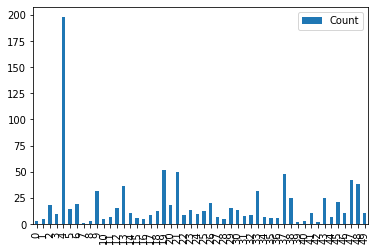

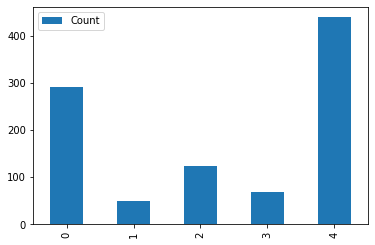

In [13]:
Amtrak_stationState_df.plot(kind='bar')

Amtrak_stationType_df.plot(kind='bar')

#### Adjust The Size of Graph & Add a Title

<AxesSubplot:title={'center':'Amtrak Stations by State'}, xlabel='State'>

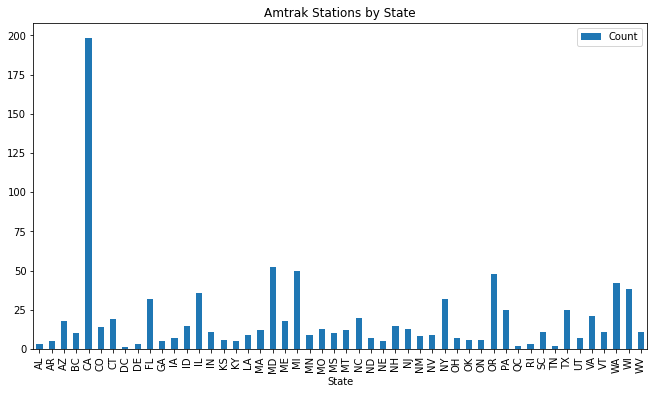

In [14]:
Amtrak_stationState_df.plot(kind='bar', x='State', y='Count', title='Amtrak Stations by State', figsize= (11,6))
# plt.minorticks_on()
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

#### Make sure that the visualization is not too busy

Reccomendations are between 7 and 12

To get to the recomendations we have a few options. 

1.  Combine items (States with more then 25 stations, 15 - 24, 10 -14, 5 - 9, and Less then 5, etc)
2.  Examine a subset of data (only the top or bottom states)

Working with a subgroup is not a horrible idea - it is similiar - but not the same as sampling.

_______
#### Reducing the number of records

Pandas Tools Used

**loc** method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame

df.loc[df['ColumnToFilterOn'] = *condition*]


In [15]:
# filter returns the index and the boolean for all values
Amtrak_stationState_df['Count'] > 25

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47     True
48     True
49    False
Name: Count, dtype: bool

Now loc will return the entire row where the value is true.

In [16]:
# del Amtrak_stationTopStates_df
# Look for the states with the larget number of stations
Amtrak_stationTopStates_df = Amtrak_stationState_df.loc[Amtrak_stationState_df['Count'] > 25]
print(Amtrak_stationTopStates_df.head())

   State  Count
4     CA    198
9     FL     32
13    IL     36
19    MD     52
21    MI     50


#### Place the reduced dataframe on the barchart

<AxesSubplot:title={'center':'Amtrak Stations by State'}, xlabel='State'>

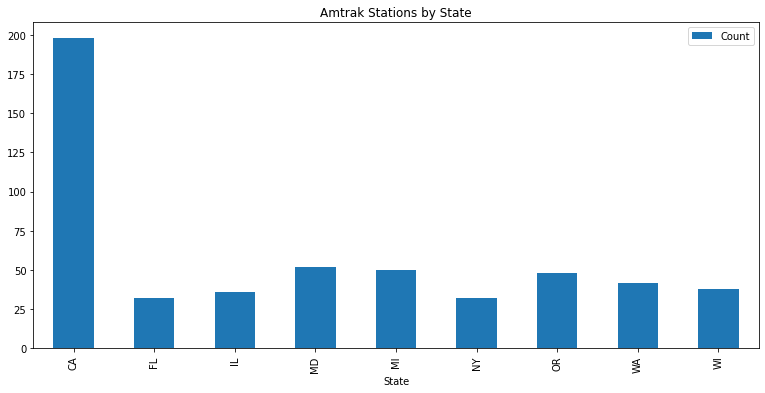

In [17]:
Amtrak_stationTopStates_df.plot(kind='bar', x='State', y='Count', 
                                title='Amtrak Stations by State', figsize= (13,6))

### Probability Distribution

A probability distribution tells us the probability that a random variable takes on certain values.

#### The math
1. Get a count of all stations in the data frame  (Saved to total)
2. Divide the individual counts by total to determine the probability

**Note** the sum of all probabilties will equal 1

#### Modify the dataframe 

Add a new column onto the dataframe


In [18]:
total = Amtrak_stationTopStates_df['Count'].sum()
Amtrak_stationTopStates_df.insert(0, 'Probability', Amtrak_stationTopStates_df['Count']/total)

#### Print out the probabity of each top state

Notice the difference in the graph height.  This was set using figsize

<AxesSubplot:title={'center':'Amtrak Stations by State'}, xlabel='State'>

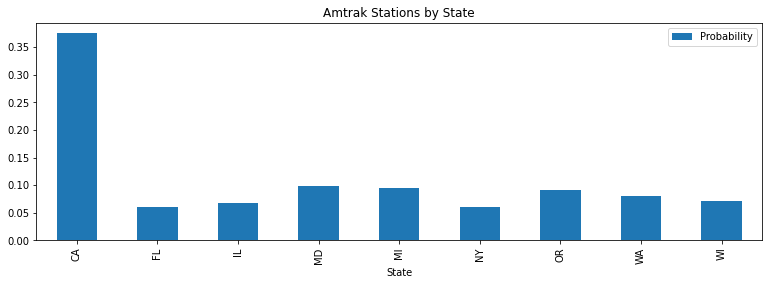

In [19]:
Amtrak_stationTopStates_df.plot(kind='bar', x='State', y='Probability', 
                                title='Amtrak Stations by State', figsize= (13,4))

So that is Categorical data from a high level.

We talked about groupng and counting. Two other things worth exploring with categorical data.

1. Pandas does have a categorical data type. These can be explored [here](https://pbpython.com/pandas_dtypes_cat.html)
2. Add dummy coulmns to extend this information for a more detaialed analysis. Review our initial counts. 

Maybe we could combine 1 and 2 and eliminate 3 to leave us with 3 catagories of stations.


In [20]:
print(Amtrak_stationType_df)

                            StationType  Count
0   Curbside Bus Stop only (no shelter)    292
1            Platform only (no shelter)     50
2                 Platform with Shelter    123
3                        Pseudo Station     69
4  Station Building (with waiting room)    439
